# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Adjust Column orders:
desired_column_order = ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites','Drug Regimen','Sex','Age_months','Weight (g)']
Adjusted_df = combined_data[desired_column_order]

Adjusted_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [37]:
# Display the number of unique mice IDs in the data

unique_mouse_ids = combined_data['Mouse ID'].nunique()
unique_mouse_ids

249

In [38]:
# check for any mouse ID with duplicate time points.

duplicate_ids = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [52]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_data = Adjusted_df[Adjusted_df['Mouse ID'].isin(duplicate_ids)]

# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Mouse ID to be removed
duplicate_mouse_id = 'g989'

# Creating a clean DataFrame by dropping all data for the duplicate mouse ID
cleaned_data = Adjusted_df[Adjusted_df['Mouse ID'] != duplicate_mouse_id]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [55]:
# Checking the number of mice in the clean DataFrame.
unique_clean_mouse_ids = cleaned_data['Mouse ID'].nunique()
unique_clean_mouse_ids

248

## Summary Statistics

In [84]:
#The mean of the tumor volume for each regimen is calculated using groupby.
mean = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [77]:
# The median of the tumor volume for each regimen is calculated using groupby. 
median =df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [81]:
# The variance of the tumor volume for each regimen is calculated using groupby. 
variance =df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [82]:
# The standard deviation of the tumor volume for each regimen is calculated using groupby. 
STD = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
STD   

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [83]:
# The SEM of the tumor volume for each regimen is calculated using groupby. 
SEM = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

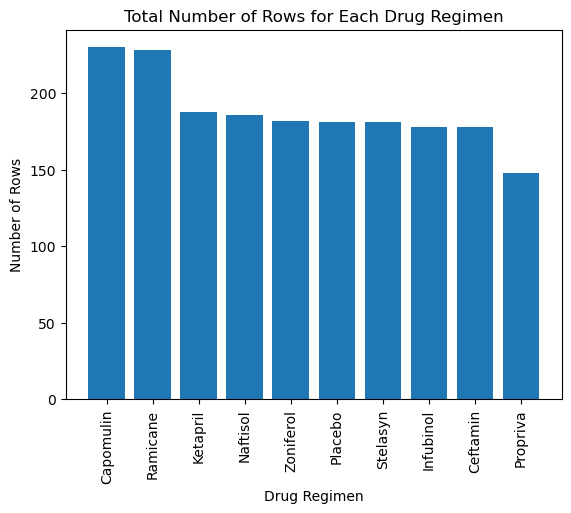

In [94]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Create a bar plot using Pandas
regimen_counts.plot(kind='bar', title='Total Number of Rows for Each Drug Regimen')

# Add labels to the axes
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Show the plot
plt.show()



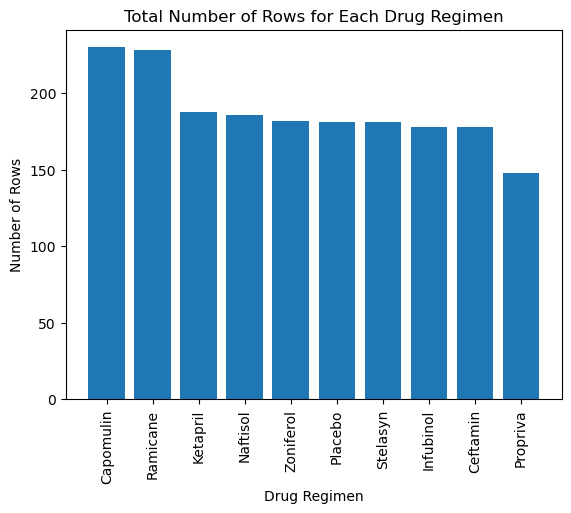

In [98]:
# A bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot is generated. 

import numpy as np
import matplotlib.pyplot as plt

# Counting the occurrences of each drug regimen
regimen_counts = cleaned_data['Drug Regimen'].value_counts()

# Setting up x-axis and tick locations
x_axis = np.arange(len(regimen_counts))
tick_locations = [value for value in x_axis]

# Creating the bar plot
plt.bar(x_axis, regimen_counts)
plt.xticks(tick_locations, regimen_counts.index, rotation='vertical')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Display the plot
plt.show()

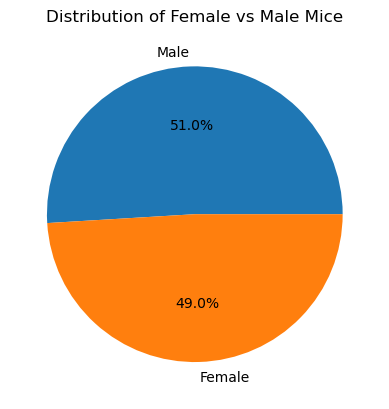

In [100]:
# A pie plot showing the distribution of female versus male mice using pyplot is generated. # Counting the number of female and male mice

sex_distribution = cleaned_data['Sex'].value_counts()
import matplotlib.pyplot as plt

# Data for pie chart
sizes = sex_distribution.values
labels = sex_distribution.index

# Creating the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Adding a title
plt.title('Distribution of Female vs Male Mice')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



# A DatFrame that has the last timepoint for each mouse ID is created using groupby.
last_timepoint_df = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [111]:
# The index of the DataFrame is reset. 
last_timepoint_df.reset_index(drop=True, inplace=True)

In [113]:
# The four treatment groups, Capomulin, Ramicane, Infubinol, and Ceftamin, are put in a list. 
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_groups

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [117]:
# Create an empty list to store tumor volume data:
tumor_vol_data = []


In [118]:
# A "for" loop is used to display the interquartile range (IQR) and the outliers for each treatment group.


# List of the four treatment groups
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_df = merged_data[merged_data['Drug Regimen'] == treatment]
    tumor_volumes = treatment_df['Tumor Volume (mm3)']

    # Add subset
    tumor_vol_data.append(tumor_volumes)

    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volumes.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]

    # Display results
    print(f"{treatment} Regimen:")
    print(f"  IQR: {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    if not outliers.empty:
        print(f"  Potential outliers: {outliers.values}")
    else:
        print("  No potential outliers found")
    print("\n")


Capomulin Regimen:
  IQR: 7.314067135000002
  Lower Bound: 26.714832162499995
  Upper Bound: 55.9711007025
  Potential outliers: [25.47214326 23.34359787]


Ramicane Regimen:
  IQR: 8.325365415
  Lower Bound: 24.1865864625
  Upper Bound: 57.488048122500004
  Potential outliers: [22.05012627]


Infubinol Regimen:
  IQR: 10.002090667500006
  Lower Bound: 32.309217298749985
  Upper Bound: 72.31757996875001
  No potential outliers found


Ceftamin Regimen:
  IQR: 9.593010457500007
  Lower Bound: 32.81891142624998
  Upper Bound: 71.19095325625001
  No potential outliers found




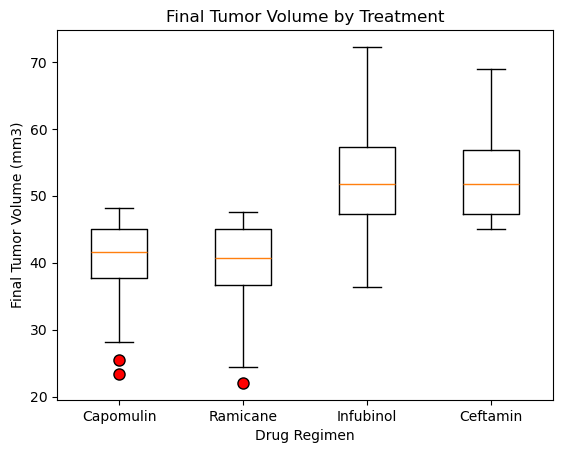

In [119]:
# A box plot is generated that shows the distribution of the final tumor volume for all the mice in each treatment group.#

import matplotlib.pyplot as plt
# Treatment group names for plot labels
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create the box plot
plt.boxplot(tumor_vol_data, labels=treatment_groups, flierprops=dict(marker='o', markerfacecolor='r', markersize=8))

# Add titles and labels
plt.title('Final Tumor Volume by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# Show the plot
plt.show()


In [106]:
# Group by 'Mouse ID' and find the maximum timepoint for each mouse
final_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_timepoints

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a275,45
3,a411,45
4,a444,45
...,...,...
95,y769,45
96,y793,45
97,y865,45
98,z578,45


## Line and Scatter Plots

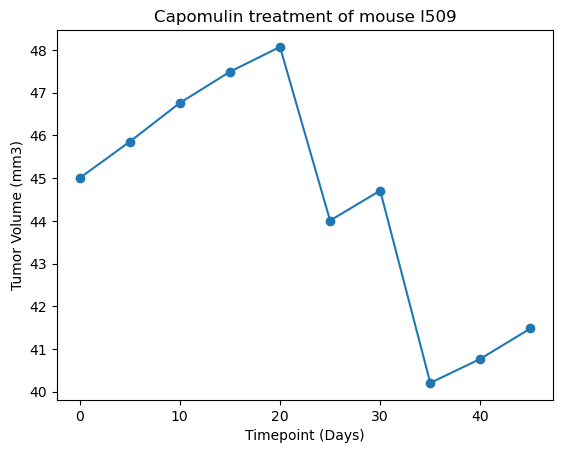

In [124]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your DataFrame and it has 'Drug Regimen', 'Mouse ID', 'Timepoint', and 'Tumor Volume (mm3)' columns
# Step 1: Filter the data for Capomulin treatment
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Step 2: Select a single mouse 
mouse_id = 'l509'  # select mouse ID as of "l509", the one used in Starter code
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Step 3: Plot tumor volume over time for that single mouse
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o')

# Adding a title and labels
plt.title(f'Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()


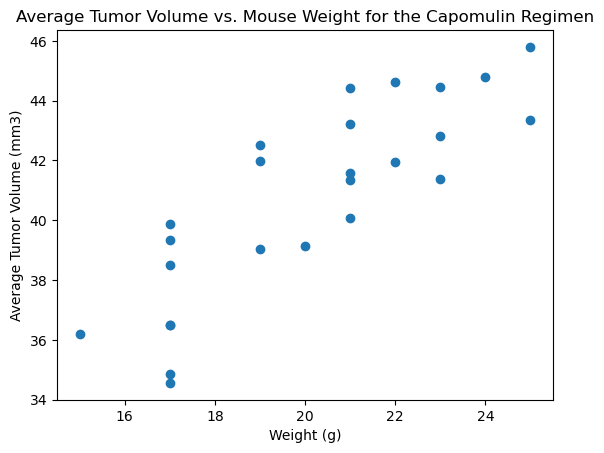

In [125]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


import matplotlib.pyplot as plt

# Assuming 'cleaned_data' is your DataFrame and it contains 'Drug Regimen', 'Mouse ID', 'Tumor Volume (mm3)', and 'Weight (g)' columns

# Step 1: Filter the data for the Capomulin regimen
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Step 2: Group by mouse ID to calculate the average tumor volume
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 3: Merge this with the mouse weight data
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()  # assuming the weight does not change
avg_tumor_vol = avg_tumor_vol.reset_index()
mouse_weight = mouse_weight.reset_index()
capomulin_summary = pd.merge(avg_tumor_vol, mouse_weight, on='Mouse ID')

# Step 4: Generate the scatter plot
plt.scatter(capomulin_summary['Weight (g)'], capomulin_summary['Tumor Volume (mm3)'])

# Adding a title and labels
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()




## Correlation and Regression

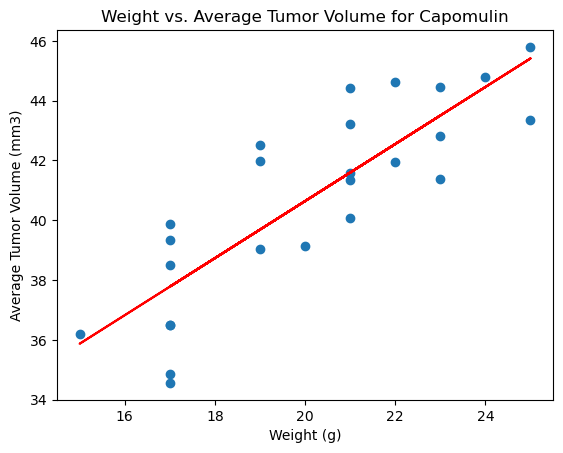

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is: 0.84
The linear regression model is: y = 0.95x + 21.55


In [130]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


import matplotlib.pyplot as plt

# Create a scatter plot of the average tumor volume vs. mouse weight
plt.scatter(mouse_grouped['Weight (g)'], mouse_grouped['Tumor Volume (mm3)'])

# Plot the linear regression line
regress_values = mouse_grouped['Weight (g)'] * slope + intercept
plt.plot(mouse_grouped['Weight (g)'], regress_values, "r-")

# Add labels and title to the plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight vs. Average Tumor Volume for Capomulin')
plt.show()

# Display the correlation coefficient and linear regression model results
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is: {correlation_coef:.2f}")
print(f"The linear regression model is: y = {slope:.2f}x + {intercept:.2f}")


